In [4]:
import numpy as np
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt

# Part 1: Binning degree distributions

A. Binning real numbers

Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution.

In [5]:
x = np.random.normal(loc=2, scale=0.125, size=5000)

Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?

In [6]:
bins = 10
ranged = None
normed = None
weights = None
density = None
hist = np.histogram(x, bins, ranged, normed, weights, density)

In [7]:
hist

(array([   2,   24,  130,  575, 1306, 1540, 1015,  323,   78,    7],
       dtype=int64),
 array([1.46843731, 1.56853691, 1.66863652, 1.76873613, 1.86883573,
        1.96893534, 2.06903495, 2.16913456, 2.26923416, 2.36933377,
        2.46943338]))

It produces two arrays, one with limit of bins and one with the amount of data points in each bin.
<br>The array of data points has a length of 10 while the array of bin limits has a length of 11. This is because it takes two bin limits to form one bin, but the two outer limits are only used once. Because of this, we simply remove the top limit.

In [8]:
alteredY = []
for i in hist[0]:
    alteredY.append(i)
    alteredY.append(i)

In [9]:
alteredX = []
alteredX.append(hist[1][0])
for i in hist[1][1:-1]:
    alteredX.append(i)
    alteredX.append(i)
alteredX.append(hist[1][-1])

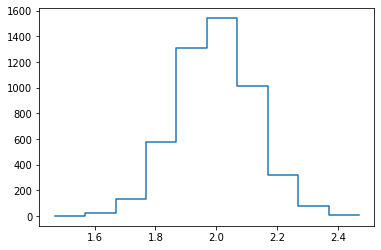

In [10]:
plt.plot(alteredX,alteredY)

B. Binning integers 


In [12]:
xp = np.random.poisson(lam=10, size=5000) 

min = xp[0]
max = xp[0]
for i in xp:
    if i > max:
        max = i
    if i < min:
        min = i
        
print("min: {}, max: {}".format(min,max))




min: 1, max: 23


[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5]


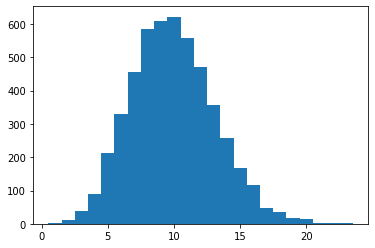

In [30]:
from tkinter import Grid


binE = [min-0.5]

for i in range(1,max+1):
    binE.append(binE[i-1]+1)
    
hist = np.histogram(xp,binE)


plt.bar(x=binE[0:-1], height= hist[0], width= 1.0, align= 'edge')


print(binE)


# Part 3: Watts-Strogatz Network 

Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1.

Calculate the average shortest path length <d> for each one. 


Describe what happens to the network when p = 1 

In [ ]:
N = 500
k = 4
p = np.array([0,0.1,1])
# Drawing graph
G = nx.watts_strogatz_graph(N,k,p[0])
G2 = nx.watts_strogatz_graph(N,k,p[1])
G3 = nx.watts_strogatz_graph(N,k,p[2])

options = {
    'node_color': 'pink',
    'node_size': 0.5,
    'width': 0.5,
}



pos = nx.circular_layout(G)
nx.draw(G,pos, **options)

pos2 = nx.circular_layout(G2)
nx.draw(G2,pos2, **options)

pos3 = nx.circular_layout(G3)
nx.draw(G3,pos3, **options)


plt.show()

ShortPath_G = nx.average_shortest_path_length(G)
ShortPath_G2 = nx.average_shortest_path_length(G2)
ShortPath_G3 = nx.average_shortest_path_length(G3)
print('With a p-value of 0.0 the average shortest path length in the graph is %s' % ShortPath_G)
print('With a p-value of 0.1 the average shortest path length in the graph is %s' % ShortPath_G2)
print('With a p-value of 1.0 the average shortest path length is the graph is  %s' % ShortPath_G3)

B

In [ ]:
def GraphGenerator(p):
    n = 50 
    k = 6
    N = 500
    AvS = []
    for i in range(1,n+1):
    
        G = nx.watts_strogatz_graph(N,k,p)
        S = nx.average_shortest_path_length(G)
        AvS.append(S)
    A = np.mean(AvS)
    M = np.std(AvS)
    
    return A,M 
 
A,M = GraphGenerator(0)
A1,M1 = GraphGenerator(0.01)  
A2,M2 = GraphGenerator(0.03)
A3,M3 = GraphGenerator(0.05)
A4,M4 = GraphGenerator(0.1)
A5,M5 = GraphGenerator(0.2)  

x = np.array([0,0.01,0.03,0.05,0.1,0.2])
y = np.array([A,A1,A2,A3,A4,A5])
E = np.array([M,M1,M2,M3,M4,M5])

import matplotlib.pyplot as plt
plt.plot(x, y, 'o-')
plt.errorbar(x,y,yerr=E )
plt.ylabel('<d>')
plt.xlabel('p')
plt.title('Wattz-strogats Network with p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}')

plt.show()

